In [2]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from collections import Counter
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#import the data
df = pd.read_csv('water_potability.csv')
#view the first first rows of the data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#check the rows and columns of the data
df.shape

(3276, 10)

In [5]:
df_temp = df.copy()

In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df_temp.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
#correlation among the features
corr = df_temp.corr()

#view the corr
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


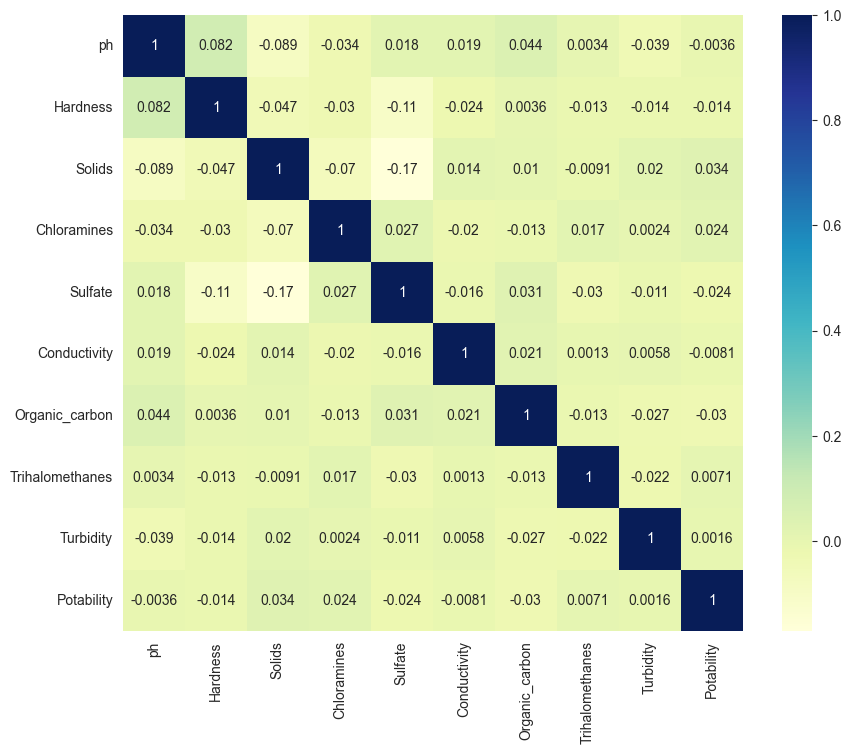

In [9]:
#better visualization with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           annot=True,
           fmt='.2g',
           cmap='YlGnBu')
plt.show()

In [10]:
#percentage of the target labels
df_temp['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [11]:
#check the unique entries of the target variable
df_temp.Potability.unique()

array([0, 1], dtype=int64)

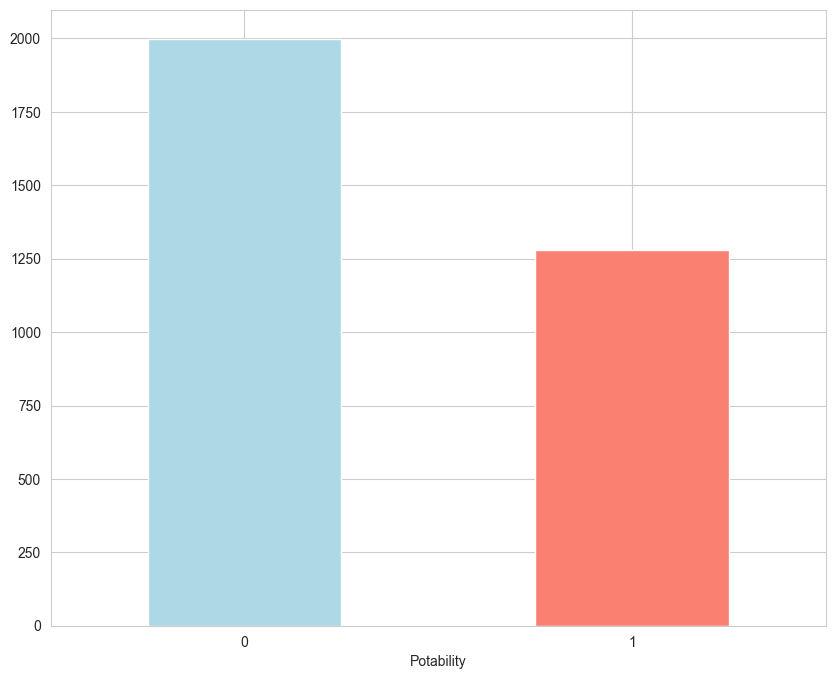

In [12]:
#bar chart showing the distribution of counts of potable water to not potable water
df_temp['Potability'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'], figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

In [13]:
#check for missing values
df_temp.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Data Pre-processing


In [14]:
#fill in the missing values using the median for each features
df_temp['ph'].fillna(df_temp['ph'].median(), inplace=True)
df_temp['Sulfate'].fillna(df_temp['Sulfate'].median(), inplace=True)
df_temp['Trihalomethanes'].fillna(df_temp['Trihalomethanes'].median(), inplace=True)

In [15]:
df_temp.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
#view the data
df_temp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
#view the target distribution
df_temp['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [18]:
#split the dataset into features and labels
X = df_temp.iloc[:, :-1]
Y = df_temp.iloc[:,-1]

In [19]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [20]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [21]:
counter = Counter(Y)
print(counter)

Counter({0: 1998, 1: 1278})


oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)
counter_oversample = Counter(Y)
print(counter_oversample)

In [22]:
#split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=21, stratify=Y)

In [23]:
sc = StandardScaler()
sc.fit(X)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train[:10]

array([[-0.78217497, -0.29656286,  2.55064469, -0.3210023 ,  0.22218537,
        -1.89029832, -0.46161222, -0.44082861,  0.33008901],
       [ 0.31847983,  1.02756832, -0.35776383, -1.75479781, -1.53183398,
         0.2605345 ,  0.98879888, -0.82865101,  0.44954997],
       [-2.00546562, -2.15650698, -1.23164827, -1.10956373, -1.99687031,
         0.23556415,  1.29727791,  1.27008803,  0.63236963],
       [-0.54044283, -0.62293586, -1.18983811, -0.03935429, -0.01479921,
         0.05094534,  0.42018108,  1.29080157, -0.88201222],
       [ 2.17595362, -0.99604954, -0.3557839 ,  1.86116254, -1.76991303,
         0.25052818, -0.73407121,  1.01715387, -1.00850758],
       [ 0.51692012,  1.35249826,  0.41983388, -1.78272077, -0.88127966,
         0.20462721,  0.78730279,  1.93385127,  1.08698014],
       [-0.02547355, -1.52454945,  0.41167473,  0.11717691, -0.01479921,
         0.46997505, -1.79284098,  0.1645212 , -0.49201828],
       [-0.05909465,  0.8415251 , -0.97055251, -0.79041109, -0

In [24]:
d = {'mean':sc.mean_,'scale':sc.scale_}
import pickle
with open('models\scaler_params.pkl','wb') as f:
    pickle.dump(d,f)

### Model Building

In [25]:
model = Sequential()
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [27]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=120)
history

Epoch 1/120


82/82 [==============================] - 2s 3ms/step - loss: 0.6835 - accuracy: 0.5809
Epoch 2/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6038
Epoch 3/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6111
Epoch 4/120
82/82 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6130
Epoch 5/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6206
Epoch 6/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6229
Epoch 7/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6225
Epoch 8/120
82/82 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6240
Epoch 9/120
82/82 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6374
Epoch 10/120
82/82 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6427
Epoch 1

### Evaluation and Results

In [28]:
from sklearn.metrics import roc_curve
Y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred_keras)

21/21 [==============================] - 0s 3ms/step


In [29]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

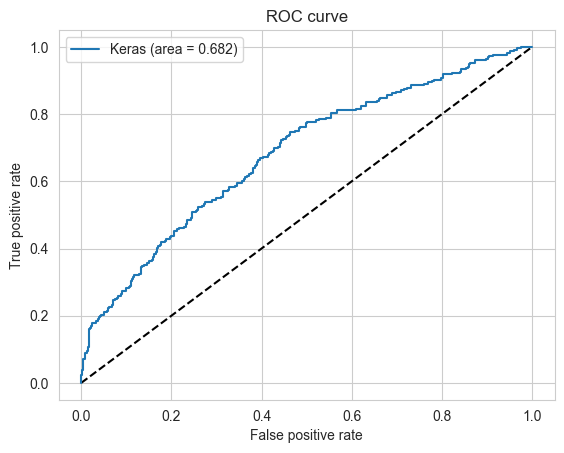

In [30]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

21/21 [==============================] - 0s 3ms/step


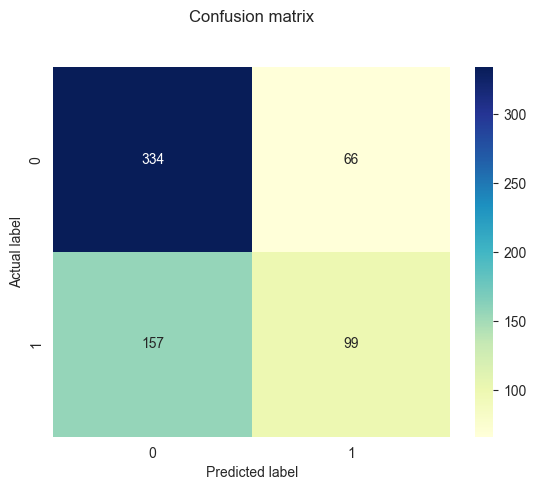

In [31]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred > 0.5
cm = confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("results\conmat.png", bbox_inches="tight", format="png")

In [32]:
loss = history.history["loss"]
acc = history.history["accuracy"]

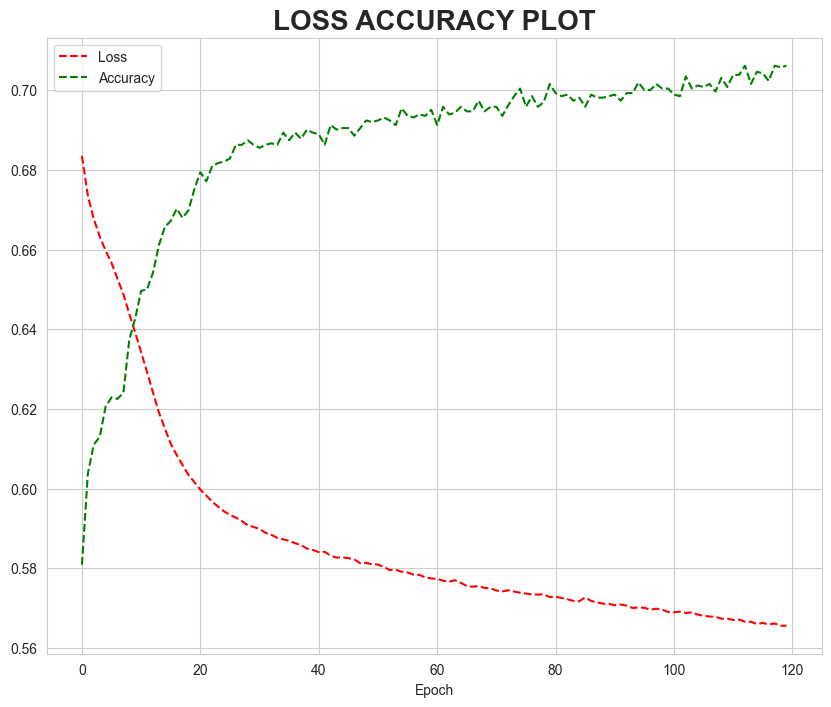

In [33]:
plt.figure(figsize=(10,8))
plt.plot(loss, "r--", label="Loss")
plt.plot(acc, "g--", label="Accuracy")
plt.title("loss accuracy plot".upper(), size=20, weight="bold")
plt.xlabel("Epoch")
plt.legend();
plt.savefig("results\loss accuracy plot.png", bbox_inches="tight", format="png")

In [34]:
model.save("models\modelwqp.h5")